<a href="https://colab.research.google.com/github/muscak/Master-Machine-Learning-Algorithms/blob/master/Ensemble-Algorithms/Bagging/Bagged_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bagged Decision Trees

## Table of Contents

## 1. Introduction<a id='intro'></a>

## 2. Import Libraries<a id='libraries'></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('whitegrid')
from sklearn.datasets import make_circles

## 3. Sample Dataset<a id='sample'></a>

The dataset contains two input variables ($x_1$ and $x_2$) and the class output variable with the values 0 and 1. The dataset contains 10 records, 5 that belong to each class.

In [2]:
x1 = [2.309572387, 1.500958319, 3.107545266, 4.090032824, 5.38660215, 
      6.451823468, 6.633669528, 8.749958452, 4.589131161, 6.619322828]
x2 = [1.168959634, 2.535482186, 2.162569456, 3.123409313, 2.109488166, 
      0.242952387, 2.749508563, 2.676022211, 0.925340325, 3.831050828]
y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

df = pd.DataFrame(zip(x1, x2, y), columns=['x1', 'x2', 'y'])
df

,x1,x2,y
0,2.309572,1.168960,0
1,1.500958,2.535482,0
2,3.107545,2.162569,0
3,4.090033,3.123409,0
4,5.386602,2.109488,0
5,6.451823,0.242952,1
6,6.633670,2.749509,1
7,8.749958,2.676022,1
8,4.589131,0.925340,1
9,6.619323,3.831051,1


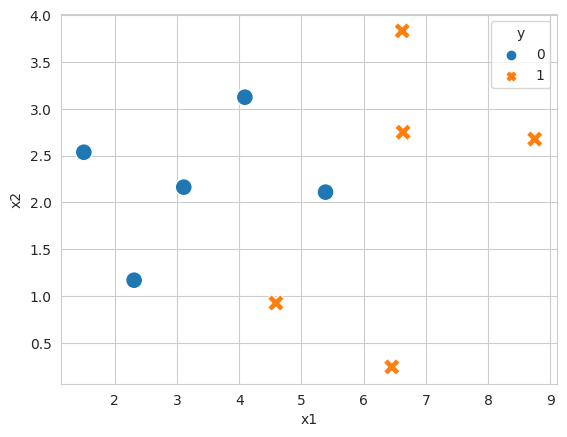

In [3]:
# Distribution of the data for each class
sb.scatterplot(data=df, x='x1', y='x2', hue='y', style='y', s=150)
plt.show()

## 4. Manual Implementation<a id='manual'></a>

We will create 3 decision trees from the training data, each with below a usual or normal level of accuracy score.

In [ ]:
def create_model(df, split):
  
  return df

In [4]:
split1 = df.loc[4, 'x1']
split2 = df.loc[3, 'x1']
split3 = df.loc[8, 'x2']

### Prediction

### Another Sample Data

As you can see the proposed algorithm predicts the labels with XXXXXXX% accuracy score for the sample dataset. We'll create a new dataset using the `make_circles` with 10% of `noise` to spice things up and check the performance of the Bagged Decision Tree algorithm. The dataset contains two input variables ($x_1$ and $x_2$) and the class output variable with the values 0 and 1. The dataset contains 100 records, 50 that belong to each class.

In [ ]:
x, y = make_circles(
    n_samples=100, # 100 observations 
    random_state=101, # if you want the same results as mine
    noise=0.1
)

# Turn it into dataframe
df_new = pd.DataFrame(zip(x[:,0], x[:,1], y), columns=['x1', 'x2', 'y'])
df_new.head()

,x1,x2,y
0,-0.489114,0.856099,0
1,0.827368,0.179709,0
2,0.516329,-0.807108,0
3,-0.365443,0.636141,1
4,-0.032702,-0.660047,1


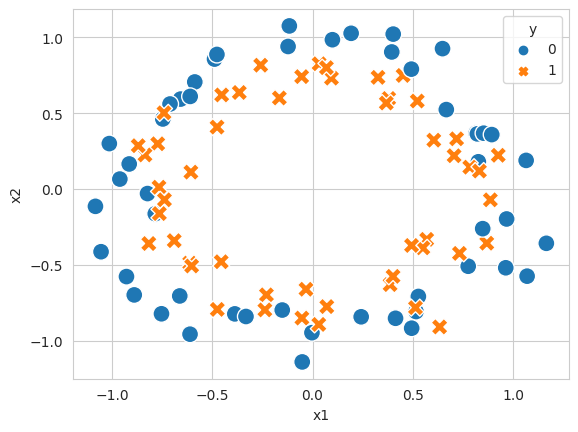

In [ ]:
sb.scatterplot(data=df_new, x='x1', y='x2', hue='y', style='y', s=150)
plt.show()

## References
